In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import torch
from torch.distributions.normal import Normal

from torch.distributions.multivariate_normal import MultivariateNormal
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
import h5py
from scipy.io import loadmat
# f = loadmat(r'Al10_waveform_ASCII/all_signal.mat')

In [5]:
import pandas as pd
import glob
files=(glob.glob("data/*.mat*"))
import mat73
mat73.loadmat(files[0])['energy']

array([3.17595716e+11, 2.97945832e+11, 3.07313924e+11, 3.02535929e+11,
       2.94725943e+11, 3.14382943e+11, 3.02400635e+11, 2.99019006e+11,
       3.03819706e+11, 3.00597703e+11, 3.03183630e+11, 2.98264356e+11,
       2.99878497e+11, 3.11617908e+11, 3.12600986e+11, 3.06575758e+11,
       3.09620809e+11, 3.29496446e+11, 3.14657367e+11, 3.17837402e+11,
       3.14344143e+11, 2.95984442e+11, 3.16635556e+11, 3.20560243e+11,
       3.00262079e+11, 3.18878868e+11, 3.01203695e+11, 3.20408433e+11,
       2.91722036e+11, 2.92619876e+11, 2.97235780e+11, 3.04056794e+11,
       3.38803567e+11, 3.40986356e+11, 3.19762891e+11, 3.27122064e+11,
       3.04417972e+11, 2.98843644e+11, 3.10365254e+11, 3.22322535e+11,
       2.99841913e+11, 3.11074289e+11, 3.33718790e+11, 3.27125204e+11,
       2.81004910e+11, 2.79618087e+11, 3.06515934e+11, 3.05929281e+11,
       2.92791885e+11, 3.17106797e+11, 2.96659771e+11, 2.93205492e+11,
       2.80993215e+11, 3.09867608e+11, 3.19701105e+11, 3.24924723e+11,
      

In [6]:
files

['data\\Energy-p30-10min-later.mat',
 'data\\Energy-p30-start.mat',
 'data\\Energy-p40-10min-later.mat',
 'data\\Energy-p40.mat',
 'data\\Energy-p50-2-10min-later.mat',
 'data\\Energy-p50.mat',
 'data\\Energy-p60-2-10min-later.mat',
 'data\\Energy-p60-2-start.mat',
 'data\\Energy-p70-10min-later.mat',
 'data\\Energy-p70-start.mat',
 'data\\Energy-p80-10min-later.mat',
 'data\\Energy-p80-start.mat',
 'data\\Energy-p90-10min-later.mat',
 'data\\Energy-p90-start.mat']

In [7]:
# for i, ind in enumerate([30,40,50,60,70,80,90]):
#     print(files[2*i+1])
#     print(files[2*i])
#     initial1=mat73.loadmat(files[2*i+1])['energy']
#     initial2=mat73.loadmat(files[2*i])['energy']
#     main_list=np.concatenate([np.array(initial1),np.array(initial2)])
#     pd.DataFrame(main_list).to_csv(str(ind)+".csv")
#     plt.plot([main_list[i] for i in range(0,1000,10)],label=ind)
#     plt.legend()

In [8]:
pred1=[]
for i, ind in enumerate([30,40,50,60,70,80,90]):
    df=pd.read_csv("DATA_PROCESSED\\"+str(ind)+".csv").iloc[:,1].values/(10**10)
    pred1.append(torch.tensor([df[i] for i in range(0,500,10)]))

In [9]:
pred1[i]

tensor([ 0.1595,  1.8869, 16.8328, 18.9934, 17.7674, 20.4852, 23.2855, 33.2176,
        33.7171, 40.3332, 40.1775, 44.4747, 36.2640, 40.5257, 40.4767, 40.6707,
        42.6243, 35.3771, 44.1622, 34.9011, 37.2786, 35.3969, 46.4366, 43.4541,
        41.1694, 45.1346, 42.3164, 30.1656, 36.7080, 33.6751, 36.0827, 35.9344,
        44.1453, 31.8057, 29.6205, 38.7210, 40.2762, 51.0236, 38.8416, 35.4937,
        37.5819, 41.0482, 40.5519, 36.2197, 29.9878, 33.3875, 44.2763, 41.7773,
        43.3316, 47.1987], dtype=torch.float64)

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

In [11]:
import torch
from torch.distributions.normal import Normal

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Initial State
        self.s_0 = nn.Parameter(torch.tensor([5.525, 5.1, 5.1,5.1], requires_grad=True)).requires_grad_(True)
        
        self.T = nn.Parameter(torch.tensor(torch.rand(4,4), requires_grad=True)).requires_grad_(True)
        
        
        self.emission1=nn.Sequential(
                                    nn.Linear(16, 16),
                                     nn.LeakyReLU(0.2),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(16, 1))
        self.emission2=nn.Sequential(
                                    nn.Linear(16, 16),
                                    nn.LeakyReLU(0.2),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(16, 1))
        
        self.emission3=nn.Sequential(nn.Linear(2, 8),
                                   nn.LeakyReLU(0.2),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(8, 16),
                                    nn.LeakyReLU(0.2))
        
        
        
        
        
        

    def forward(self, x,t,pred):
        x_data=[]
        T1=F.softmax(net.T.clone())
        T=torch.tensor(torch.zeros(4,4))
        
        d=0
        for m in range(0,4):
            T[m,m]=T1[m,m]
        for m in range(1,4):
            T[m-1,m]=T1[m-1,m]
#         for m in range(2,4):
#             T[m-2,m]=T1[m-2,m]
#         for m in range(3,4):
#             T[m-3,m]=T1[m-3,m]
        T=(T.T/T.sum(axis=1)).T
        T=(T.T/T.sum(axis=1)).T
        x = F.softmax((x.clone()),dim=0)
        l=0.0

        x_temp=x.clone()
        x_data.append(x_temp.clone().detach().numpy())    
            
            
            
        o_1= self.emission((torch.tensor([1.0,0.0]).to(device)))
# #         o_1[1]=torch.exp(o_1[1])
        dist=Normal(o_1[0], o_1[1])
        
        o_1 = torch.exp(dist.log_prob(pred[0]))
        
        x_temp[0]=o_1*x[0].clone()

        o_1= self.emission((torch.tensor([2.0,0.0]).to(device)))
#         o_1[1]=torch.exp(o_1[1])
        dist=Normal(o_1[0], o_1[1])
        o_1 = torch.exp(dist.log_prob(pred[0]))
        x_temp[1]=o_1.clone()*x[1].clone()

        o_1= self.emission((torch.tensor([3.0,0.0]).to(device)))
#         o_1[1]=torch.exp(o_1[1])
        dist=Normal(o_1[0], o_1[1])
        o_1 = torch.exp(dist.log_prob(pred[0]))
        x_temp[2]=o_1*x[2].clone()
        
        o_1= self.emission((torch.tensor([4.0,0.0]).to(device)))
#         o_1[1]=torch.exp(o_1[1])
        dist=Normal(o_1[0], o_1[1])
        o_1 = torch.exp(dist.log_prob(pred[0]))
        x_temp[3]=o_1*x[3].clone()
        
#         print(x_temp)
        


        x_temp=x_temp.clip(1e-16,1)
        
        x=x_temp.clone()/torch.sum(x_temp.clone())
        x_data.append(x.clone().detach().numpy())
        l+=torch.log(torch.sum(x.clone()))# -0.01*state
        
        for i in range(1,t): 

#             if((x.sum()-1)>0):
#                 x[0]=x[0]-x.sum()+1
#                 if((x.sum()-1)>0):
#                     print("DIVERGE")
            x=torch.matmul(x,T)
#             if((x.sum()-1)>0):
#                 x[0]=x[0]-x.sum()+1
#                 if((x.sum()-1)>0):
#                     print("DIVERGE")
            x_temp=x.clone()
            

            x_temp1=x.clone()
            o_1= self.emission((torch.tensor([1.0,i]).to(device)))
#             o_1[1]=torch.exp(o_1[1])
            dist=Normal(o_1[0], o_1[1])
            o_1 = torch.exp(dist.log_prob(pred[i]))
#             print(dist.log_prob(pred[i]))
            x_temp[0]=o_1*x[0]

            o_1=self.emission((torch.tensor([2.0,i]).to(device)))
#             o_1[1]=torch.exp(o_1[1])
            dist=Normal(o_1[0], o_1[1])
            o_1 = torch.exp(dist.log_prob(pred[i]))
            x_temp[1]=o_1.clone()*x[1]
 
            o_1= self.emission((torch.tensor([3.0,i]).to(device)))
#             o_1[1]=torch.exp(o_1[1])
            dist=Normal(o_1[0], o_1[1])
            o_1 = torch.exp(dist.log_prob(pred[i]))
            x_temp[2]=o_1*x[2]

            o_1= self.emission((torch.tensor([4.0,i]).to(device)))
#             o_1[1]=torch.exp(o_1[1])
            dist=Normal(o_1[0], o_1[1])
#             print(o_1)
            o_1 = torch.exp(dist.log_prob(pred[i]))
            x_temp[3]=o_1*x[3].clone()
            
            
            
#             print(x_temp)
#             print(pred[i])
#             print(x_temp.sum())
            x_temp=x_temp.clip(1e-16,1)

            x=x_temp.clone()/torch.sum(x_temp.clone())
            x_data.append(x.clone().detach().numpy())
#             print(x)
#             print("-----------------------------")
            l+=torch.log(torch.sum(x_temp.clone()))
        return l,x_data
    
    def transition(self,x):
        x=torch.matmul(x.to(device),F.softmax(self.T,dim=1))
        x_temp=x.clone()
        return x
    def Observation(self,x):

        o_1= self.emission((x))
        o_1[1]=torch.exp(o_1[1])

        return o_1
    def emission(self,x):
        x= self.emission3((x))
        
        o_1= self.emission1((x))
        o_2= self.emission2((x))
        o_2=torch.exp(o_2).clip(0.399,1e+16)

        return o_1,o_2
    
    def simulate(self):
         o=[]
         x1 = 0
         for i in range(0,1000):
             print(x1)
            
            
            
            
             if x1==0:
                x=torch.tensor([1.0,0.0,0]).to(device)
             if x1==1:
                x=torch.tensor([0, 1.0,0.0]).to(device)
             if x1==2:
                x=torch.tensor([0.0,0.0,1]).to(device)
             o_1= self.emission((x)) 
             o_1=o_1/torch.sum(o_1)

             o.append(torch.distributions.Categorical(o_1.to(device)).sample())
             if x1==2:
                
                return o
             x = self.transition((x))
             x1=(torch.distributions.Categorical(x.to(device)).sample()).item()



In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
device='cpu'

cuda:0


In [14]:
# f=distribution_initalize(o[0])

def Expectation_diff(o_1):
    return torch.sum(o_1[0])

def var_diff(o_1):
    return torch.sum(o_1[1])

def abs_diff(e):
    k=0
    for i,e1 in enumerate(e):
        for j,e2 in enumerate(e):
            if j==i+1:
                k+=torch.abs(e2-e1)
    return k


In [15]:
net=Net()
net.load_state_dict(torch.load("Model_model_1.pth"))
net.to(device)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.T = nn.Parameter(torch.tensor(torch.rand(4,4), requires_grad=True)).requires_grad_(True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\3554547652.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via

Net(
  (emission1): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
  (emission2): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
  (emission3): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
  )
)

Text(0.5, 0, 'Time')

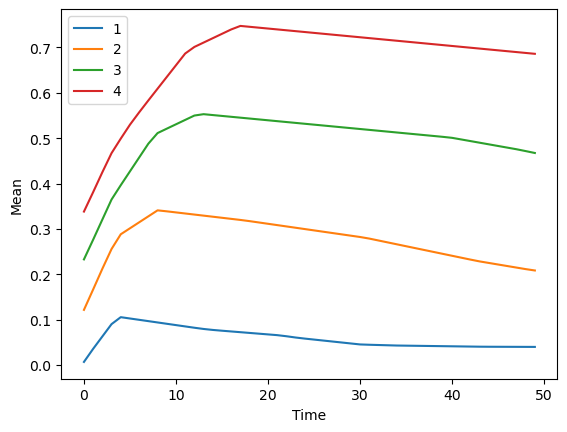

In [16]:
plt.plot([net.emission(torch.tensor([1.0,i]))[0].cpu().detach().numpy()[0]/50 for i in range(0,50)],label="1")
plt.plot([net.emission(torch.tensor([2.0,i]))[0].cpu().detach().numpy()[0]/50 for i in range(0,50)],label="2")
plt.plot([net.emission(torch.tensor([3.0,i]))[0].cpu().detach().numpy()[0]/50 for i in range(0,50)],label="3")
plt.plot([net.emission(torch.tensor([4.0,i]))[0].cpu().detach().numpy()[0]/50 for i in range(0,50)],label="4")
plt.legend()
plt.ylabel("Mean")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

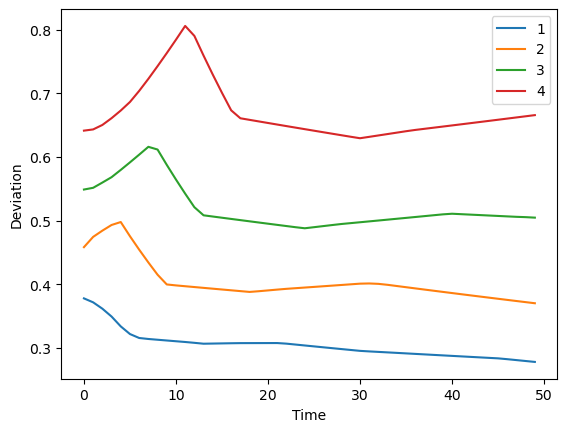

In [17]:
plt.plot([net.emission(torch.tensor([1.0,i]))[1].cpu().detach().numpy()[0]/50**0.5 for i in range(0,50)],label="1")
plt.plot([net.emission(torch.tensor([2.0,i]))[1].cpu().detach().numpy()[0]/50**0.5 for i in range(0,50)],label="2")
plt.plot([net.emission(torch.tensor([3.0,i]))[1].cpu().detach().numpy()[0]/50**0.5 for i in range(0,50)],label="3")
plt.plot([net.emission(torch.tensor([4.0,i]))[1].cpu().detach().numpy()[0]/50**0.5 for i in range(0,50)],label="4")
plt.legend()
plt.ylabel("Deviation")
plt.xlabel("Time")

In [18]:
pred1[1].shape

torch.Size([50])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\2444971041.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


410


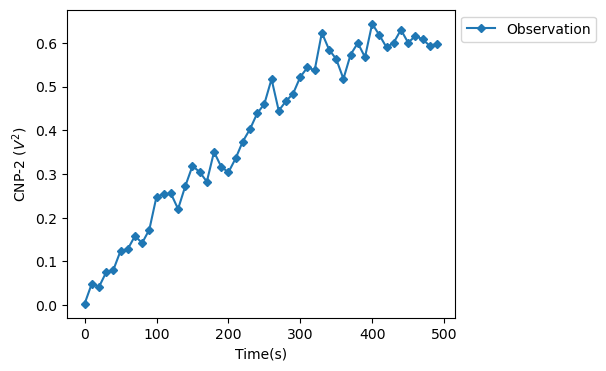

270


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\2444971041.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


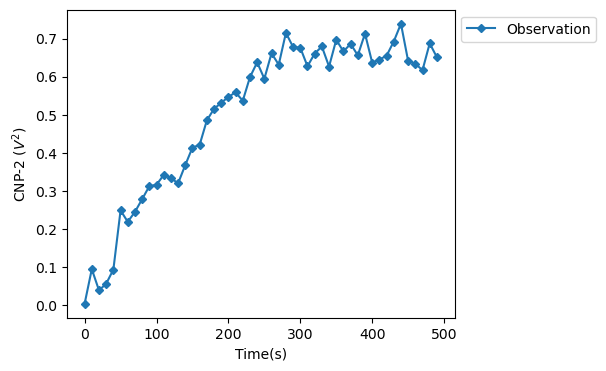

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\2444971041.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


190


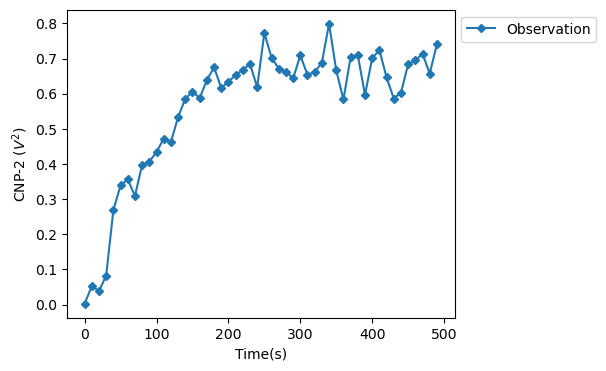

160


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\2444971041.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


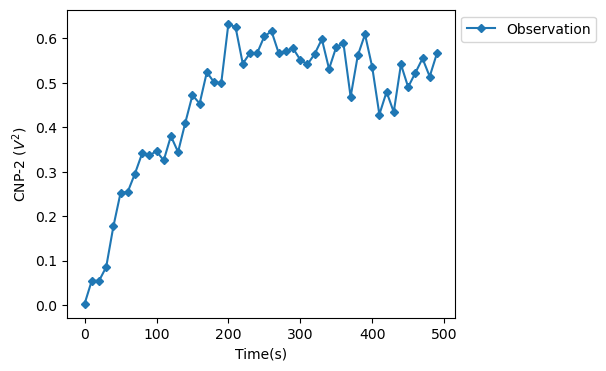

60


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\2444971041.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


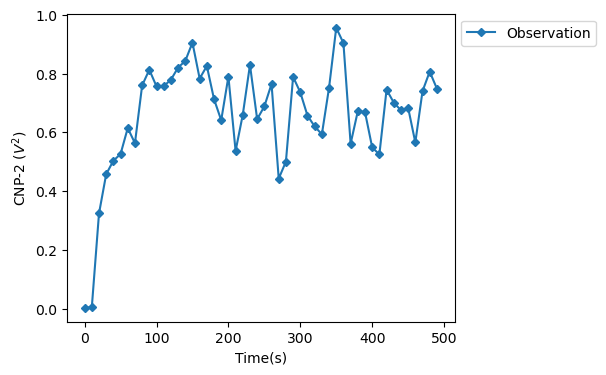

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\2444971041.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


70


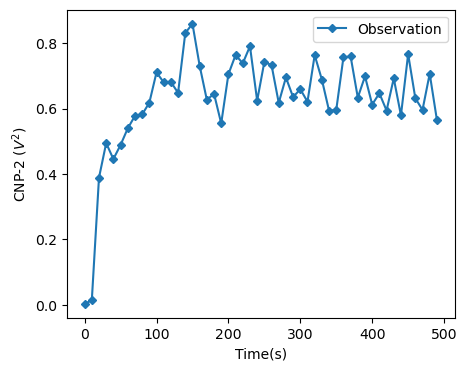

80


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\2444971041.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


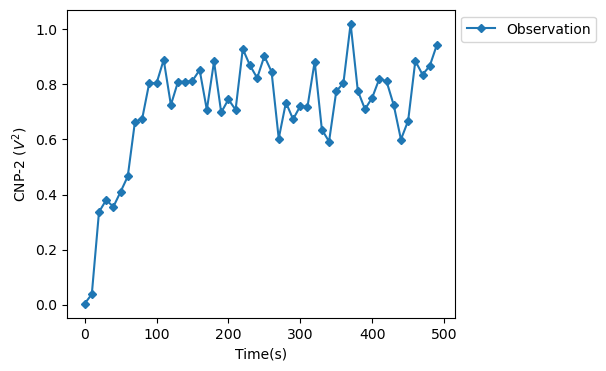

In [19]:
steady_state=[]
for i in range(0,7):
#         optimizer.zero_grad()
        loss=0.0

#         o,t=simulate_HMM(T_matrix,O_matrix_mean,s_0,t)
        o=pred1[i]
        fig,ax = plt.subplots(1,1,figsize=(5,4))

#                 pred=torch.zeros((1,t), dtype=torch.int32)
        pred=torch.tensor(o)
        t=o.shape[0]
#         dist=distribution_update(dist,o)
        loss,x_data=net(net.s_0,t,pred.to(device))
        plt.plot(np.arange(0,50)*10,pred1[i]/50,marker='D',label='Observation',markersize=4)
        plt.ylabel("CNP-2 $(V^2)$")
        # ax[1].set_xlabel("Time(s)")
        plt.xlabel("Time(s)")
        # ax[1].plot(np.arange(0,50)*10,(np.array([np.argmax(x_data[i])+1 for i in range(0,50)])),marker='o',color='red',linestyle=':',markersize=3)
        print(np.argmax(np.array([np.argmax(x_data[i]) for i in range(0,50)]))*10)
        steady_state.append(np.argmax(np.array([np.argmax(x_data[i])+1 for i in range(0,50)]))*10)
        # plt.ylabel("Filtered State")
        # plt.axvline(np.argmax(np.array([np.argmax(x_data[i]) for i in range(0,50)]))*10,color='black',linestyle=':')
        # ax[1].axvline(np.argmax(np.array([np.argmax(x_data[i]) for i in range(0,50)]))*10,color='black',linestyle=':', label="Steady \n State")
        plt.legend(bbox_to_anchor=(1.0, 1.0))
        plt.savefig('Final Plots\data_'+str(i)+'.pdf',dpi=1200,bbox_inches='tight')
        plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1111570980.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


410


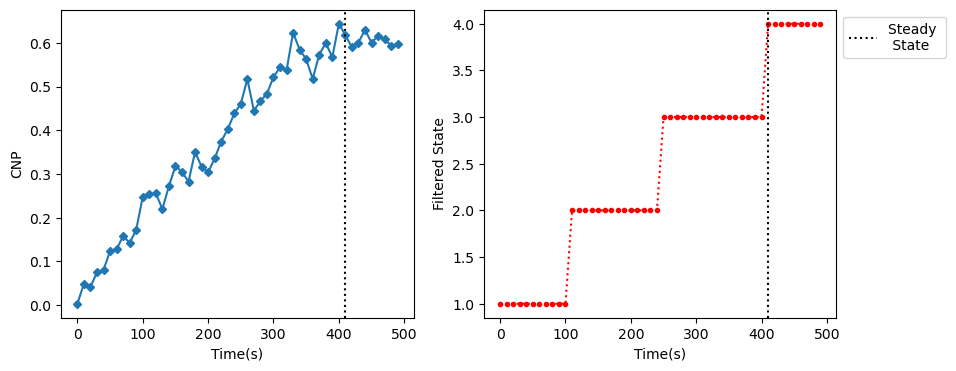

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1111570980.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


270


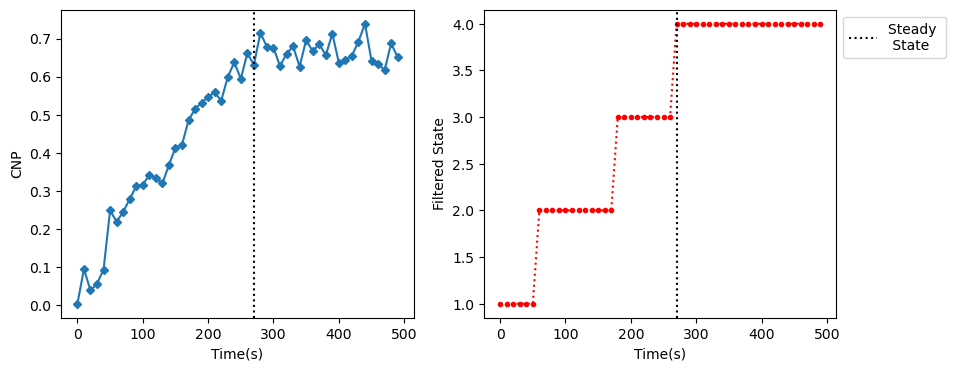

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1111570980.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


190


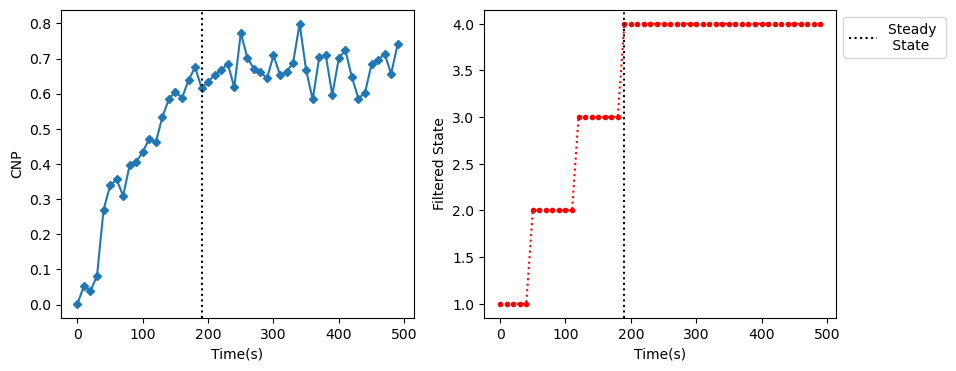

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1111570980.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


160


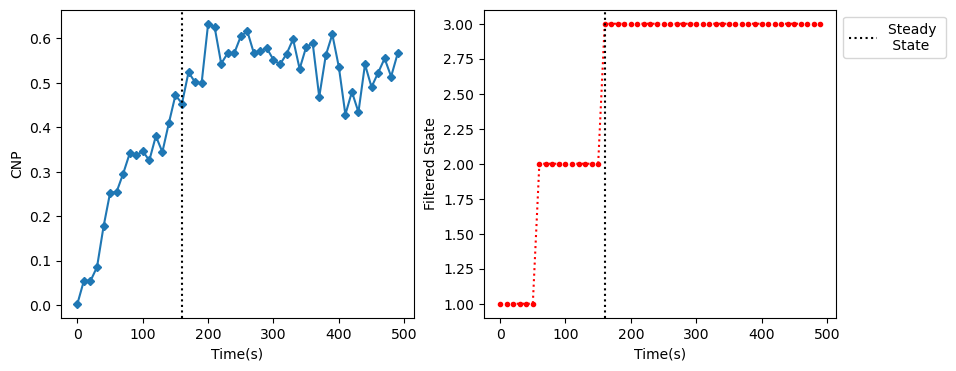

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1111570980.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


60


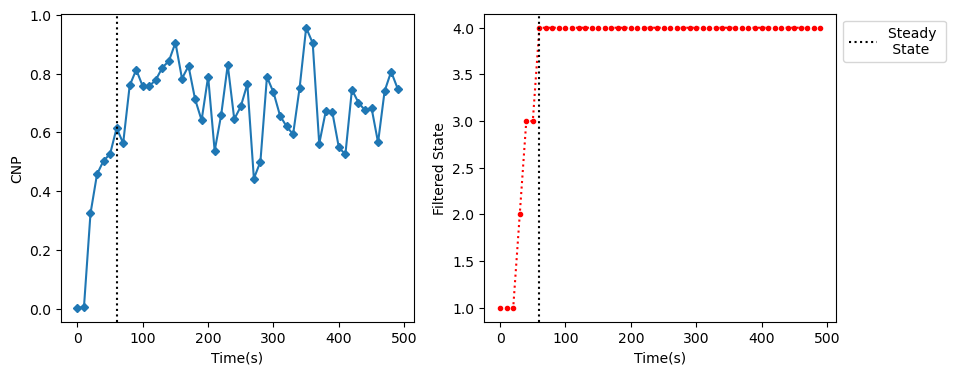

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1111570980.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


70


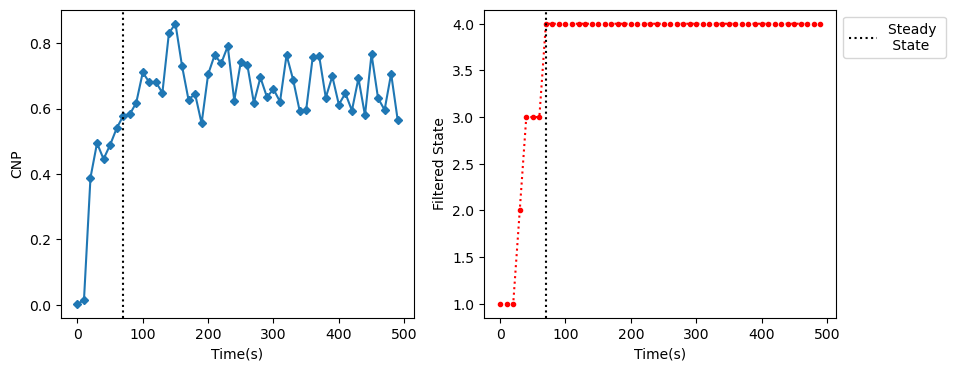

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1111570980.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(o)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T1=F.softmax(net.T.clone())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5600\1610414902.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T=torch.tensor(torch.zeros(4,4))


80


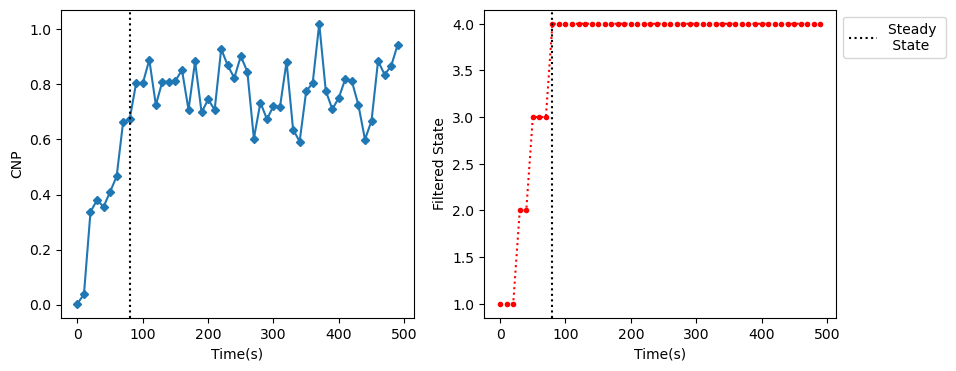

In [20]:
steady_state=[]
for i in range(0,7):
#         optimizer.zero_grad()
        loss=0.0

#         o,t=simulate_HMM(T_matrix,O_matrix_mean,s_0,t)
        o=pred1[i]
        fig,ax = plt.subplots(1,2,figsize=(10,4))

#                 pred=torch.zeros((1,t), dtype=torch.int32)
        pred=torch.tensor(o)
        t=o.shape[0]
#         dist=distribution_update(dist,o)
        loss,x_data=net(net.s_0,t,pred.to(device))
        ax[0].plot(np.arange(0,50)*10,pred1[i]/50,marker='D',label='Observation',markersize=4)
        ax[0].set_ylabel("CNP")
        ax[1].set_xlabel("Time(s)")
        ax[0].set_xlabel("Time(s)")
        ax[1].plot(np.arange(0,50)*10,(np.array([np.argmax(x_data[i])+1 for i in range(0,50)])),marker='o',color='red',linestyle=':',markersize=3)
        print(np.argmax(np.array([np.argmax(x_data[i]) for i in range(0,50)]))*10)
        steady_state.append(np.argmax(np.array([np.argmax(x_data[i])+1 for i in range(0,50)]))*10)
        plt.ylabel("Filtered State")
        ax[0].axvline(np.argmax(np.array([np.argmax(x_data[i]) for i in range(0,50)]))*10,color='black',linestyle=':')
        ax[1].axvline(np.argmax(np.array([np.argmax(x_data[i]) for i in range(0,50)]))*10,color='black',linestyle=':', label="Steady \n State")
        plt.legend(bbox_to_anchor=(1.0, 1.0))
        plt.savefig('Final Plots\Case_study_'+str(i)+'.pdf',dpi=1200,bbox_inches='tight')
        plt.show()

In [21]:
BIC_deep=[2149.35, 2066.665, 2262.590]

BIC_normal=[2665.51403, 2157.513, 2467.821]

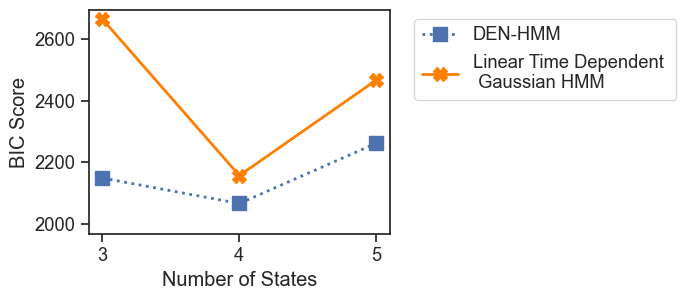

In [22]:
sns.set(style="ticks",font_scale=1.2)
plt.figure(figsize=(4,3))
X_axis = np.arange(3)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

 
color=['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#dede00', '#e41a1c']
marker=["s","X","P","D","3","+","x","X","2"]        
ax1 = plt.subplot(1, 1, 1)
ax1.plot(BIC_deep, label = 'DEN-HMM', linewidth=2, markersize=10, linestyle = ':',marker=marker[0])
ax1.plot(BIC_normal, label = 'Linear Time Dependent \n Gaussian HMM', color='#ff7f00', linewidth=2, markersize=10, linestyle = '-',marker=marker[1])
# ax1.bar(X_axis + 0.1,normal_1, 0.2,edgecolor='black', color='cyan', label = 'Linear Time Dependent \n Gaussian HMM',hatch='x')
# addlabels(X_axis-0.2, u_3_2)
ax1.set_xticks(X_axis, [3,4,5])
# ax1.set_title("Case I")
# plt.title("3 Units")
ax1.set_ylabel("BIC Score")
ax1.set_xlabel("Number of States")
ax1.set_ylim(BIC_deep[1]-100)
plt.tight_layout(pad=0.5)

ax1.legend(bbox_to_anchor=(1.05, 1.0))


plt.savefig('BIC-SCORE'+'.pdf',dpi=1200,bbox_inches='tight')
plt.savefig('BIC-SCORE'+'.png',dpi=1200,bbox_inches='tight')